In [40]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

font = 22   
#matplotlib.rcParams['font.family'] = 'cambria'
#matplotlib.rc('font',family='helvetica')
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

In [43]:
stage = 'pi0'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)
df = df.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)
df0 = df0.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)
df1 = df1.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')


df['pi0_Easym'] =  (df['pi0_high_shrE'] -  df['pi0_low_shrE']  ) / (df['pi0_high_shrE']  + df['pi0_low_shrE'] )
df0['pi0_Easym'] = (df0['pi0_high_shrE'] - df0['pi0_low_shrE'] ) / (df0['pi0_high_shrE'] + df0['pi0_low_shrE'] )
df1['pi0_Easym'] = (df1['pi0_high_shrE'] - df1['pi0_low_shrE'] ) / (df1['pi0_high_shrE'] + df1['pi0_low_shrE'] )

df['pi0_E_w_asym']  = df['pi0_mass'] * np.sqrt( 2 / ( 1 - df['pi0_Easym']**2)*(1 - np.cos(df['pi0_oangle'])) ) 
df0['pi0_E_w_asym']  = df0['pi0_mass'] * np.sqrt( 2 / ( 1 - df0['pi0_Easym']**2)*(1 - np.cos(df0['pi0_oangle'])) ) 
df1['pi0_E_w_asym']  = df1['pi0_mass'] * np.sqrt( 2 / ( 1 - df1['pi0_Easym']**2)*(1 - np.cos(df1['pi0_oangle'])) ) 

print df0.shape, df1.shape, df.shape

labels_tst = ['Cosmics','Cosmic+Neutrino','Other','$\nu_{\mu}$ NC $\pi^0$',\
                  '$\nu_{\mu}$ Mult $\pi^0$','$\nu_{\mu}$ CEx','Final State EM','$\nu_{\mu}$ CC 1 $\pi^0$']
    
colors_tst = ['lightgrey','dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 


(69, 93) (0, 93) (633, 93)


In [44]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT

In [45]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')



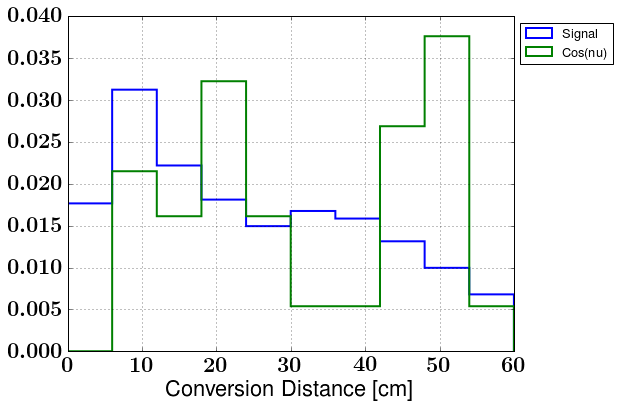

In [39]:
labels_tst = ['Signal','FinalEM','CCCEx','Multpi0','NCpi0','Other','Cos(nu)']
df_v = [cc1pi0_v,nu_EM_v,cccex_v,multpi0_v,nc1pi0_v,oth_v,cos_v ]

labels_tst = ['Signal','Cos(nu)']
df_v = [cc1pi0_v,cos_v ]

plt.figure(figsize=(8,6))

for i in xrange(len(df_v)):
    plt.hist(df_v[i]['pi0_low_radL'].values,bins=10,range=(0,60),label=labels_tst[i],normed=True,histtype='step',lw=2)

plt.legend(fontsize=13,loc='upper left',bbox_to_anchor=(1,1))
plt.grid(True)
plt.xlabel('Conversion Distance [cm]')

In [1]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',unit='cm'):

     counts, edges,_ = ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bar_bin_width,histtype='stepfilled')
 
    plt.bar(bar_bins,(err_mc_off*2)*new_weight,width=bar_bin_width,bottom = (bnbcos_m + off_m - err_mc_off)*new_weight,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on*new_weight,xerr=data_bar_bin_width,yerr=err_on*new_weight,fmt='ko',label='Data',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
     

    lgd = plt.legend(handles=handles,fontsize=18,loc=0,title=r'4.92$ \times 10^{19}$ POT') 
    lgd.legendHandles[0]._legmarker.set_markersize(2)
    #lgnd.legendHandles[1]._legmarker.set_markersize(6)   

    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.xticks([0,100,200,300,400],weight='bold')
    plt.ylim(0.001)
    
    plt.ylabel('Events / %s '%(unit),fontsize=font,weight='bold')
    
    plt.text(0.45,1.01,r'\textbf{MicroBooNE Preliminary}',weight='bold',color='r',fontsize=18,transform = ax.transAxes)

    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Paper_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

In [2]:
bins=[0,25,50,75,100,125,170,270,400]
makeOnOffPlots('pi0_mass',0,400,nbins=bins,xlabel=r'$\mathrm{\sqrt{E_1 E_2 (1-cos\theta_{12})} [MeV]}$',unit='MeV')

NameError: global name 'np' is not defined

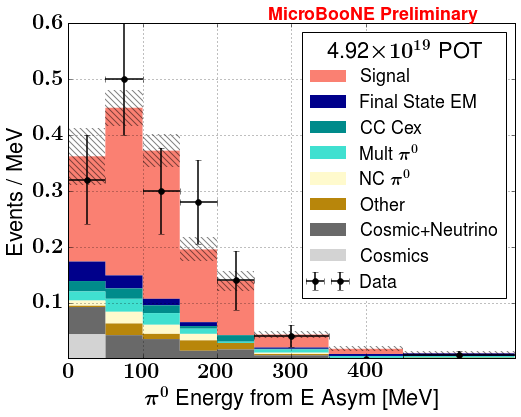

In [105]:
bins=[0,50,100,150,200,250,350,450,600]
makeOnOffPlots('pi0_E_w_asym',0,600,nbins=bins,xlabel=r'\mathrm{$\pi^0$ Energy from E Asym [MeV]}',unit='MeV')

## Now it's time to radiation legnth...of both candidates

In [106]:
dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

In [107]:
var = 'pi0_low_radL'
var2 = 'pi0_high_radL'


new_cos = np.concatenate((cos_v[var].values,cos_v[var2].values),axis=0)
new_cc1pi0 = np.concatenate((cc1pi0_v[var].values,cc1pi0_v[var2].values),axis=0)
new_nc1pi0 = np.concatenate((nc1pi0_v[var].values,nc1pi0_v[var2].values),axis=0)
new_multpi0 = np.concatenate((multpi0_v[var].values,multpi0_v[var2].values),axis=0)
new_cccex = np.concatenate((cccex_v[var].values,cccex_v[var2].values),axis=0)
new_nu_EM = np.concatenate((nu_EM_v[var].values,nu_EM_v[var2].values),axis=0)
new_oth = np.concatenate((oth_v[var].values,oth_v[var2].values),axis=0)

In [108]:
def makePlots(var,var2,xmin,xmax,nbins=20,xlabel='',unit='cm'):

    new_on = np.concatenate((df0[var].values,df0[var2].values),axis=0)
    new_off = np.concatenate((df1[var].values,df1[var2].values),axis=0)
    new_mc = np.concatenate((df[var].values,df[var2].values),axis=0)
    
    x_on, y_on = np.histogram(new_on,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(new_off,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(new_mc,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
    
    sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)+len(cc1pi0_v[var2].values) ) ] 
    cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)+len(cos_v[var2].values)) ] 
    nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)+len(nc1pi0_v[var2].values)) ] 
    multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)+len(multpi0_v[var2].values)) ] 
    cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)+len(cccex_v[var2].values)) ] 
    nuEM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)+len(nu_EM_v[var2].values)) ] 
    oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)+len(oth_v[var2].values)) ] 
    cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]*2) ] 
    all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)+len(df[var2].values)) ] 
    
    df_v = [new_off, new_cos, new_oth,new_nc1pi0, new_multpi0, new_cccex, new_nu_EM,new_cc1pi0]
    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nuEM_w,sig_w]
    
    
    for i in xrange(len(weights)):
        w = weights[i]
        for j in xrange(len(w)):
            if df_v[i][j] < bins[1] :
                w[j] *= (1./(nbins[1]-nbins[0]))
            elif df_v[i][j] >= nbins[1] and df_v[i][j] < nbins[2]:
                w[j] *= (1./(nbins[2]-nbins[1]))
            elif df_v[i][j] >= nbins[2] and df_v[i][j] < nbins[3]:
                w[j] *= (1./(nbins[3]-nbins[2]))
            elif df_v[i][j] >= nbins[3] and df_v[i][j] < nbins[4]:
                w[j] *= (1./(nbins[4]-nbins[3]))
            elif df_v[i][j] >= nbins[4] and df_v[i][j] < nbins[5]:
                w[j] *= (1./(nbins[5]-nbins[4]))
            elif df_v[i][j] >= nbins[5] and df_v[i][j] < nbins[6]:
                w[j] *= (1./(nbins[6]-nbins[5]))
            elif df_v[i][j] >= nbins[6] and df_v[i][j] < nbins[7]:
                w[j] *= (1./(nbins[7]-nbins[6]))
            elif df_v[i][j] >= nbins[7] and df_v[i][j] < nbins[8]:
                w[j] *= (1./(nbins[8]-nbins[7]))
            elif df_v[i][j] >= nbins[8] and df_v[i][j] < nbins[9]:
                w[j] *= (1./(nbins[9]-nbins[8]))
            elif df_v[i][j] >= nbins[9] and df_v[i][j] < nbins[10]:
                w[j] *= (1./(nbins[10]-nbins[9]))
            elif df_v[i][j] >= nbins[10] and df_v[i][j] < nbins[11]:
                w[j] *= (1./(nbins[11]-nbins[10]))
              
    lgd = 0

    fig,ax = plt.subplots(figsize=(8,6))
    
    bar_bin_width = [nbins[i+1] - nbins[i] for i in xrange(len(nbins)-1) ]
    bar_bins = [(nbins[i+1] + nbins[i])/2 - (bar_bin_width[i])/2 for i in xrange(len(nbins)-1) ]
    
    data_bar_bin_width = [(nbins[i+1] - nbins[i])/2 for i in xrange(len(nbins)-1) ]

    new_weight = [ 1. / bar_bin_width[i] for i in xrange(len(bar_bin_width))]
    
    counts, edges,_ = ax.hist([new_off,new_cos,new_oth,new_nc1pi0,new_multpi0,\
        new_cccex,new_nu_EM,new_cc1pi0],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bar_bin_width,histtype='stepfilled')
 
    plt.bar(bar_bins,(err_mc_off*2)*new_weight,width=bar_bin_width,bottom = (bnbcos_m + off_m - err_mc_off)*new_weight,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on*new_weight,xerr=data_bar_bin_width,yerr=err_on*new_weight,fmt='ko',label='Data',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels() 
    lgd = plt.legend(handles=handles,fontsize=20,loc='upper left',bbox_to_anchor=(1,1),title=r'4.92$ \times 10^{19}$ POT')
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.xticks(weight='bold')
    plt.ylim(0.001)
    plt.ylabel('Events / %s '%(unit),fontsize=font,weight='bold')
    
    plt.text(0.45,1.01,r'\textbf{MicroBooNE Preliminary}',weight='bold',color='r',fontsize=18,transform = ax.transAxes)

    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Paper_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

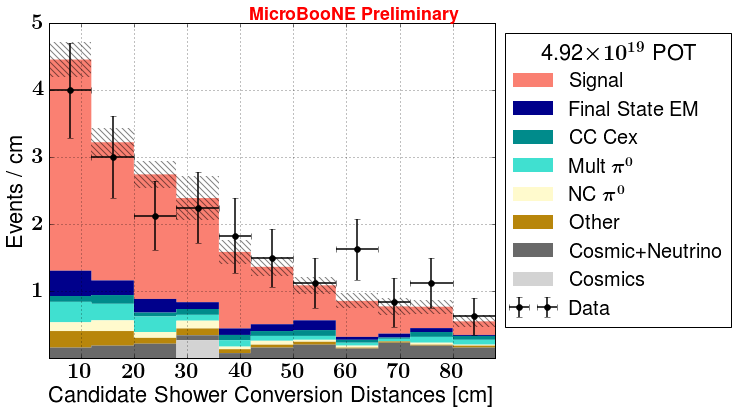

In [109]:
bins=[4,12,20,28,36,42,50,58,66,72,80,88] #,22,28,34,40,48,60] 
makePlots('pi0_low_radL','pi0_high_radL',4,88,nbins=bins,xlabel='Candidate Shower Conversion Distances [cm]')


In [110]:
stage = 'singleshower'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)
print df.shape, df0.shape, df1.shape

(2167, 91) (257, 91) (7, 91)


In [111]:
print off_to_on

2.168404449


In [112]:
dfa = df.query('gamma_origin != 2 and bkgd_id !=1')
cos_v = df.query('bkgd_id == 1 or gamma_origin == 2')

cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) & gamma_type == 1 )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & gamma_type != 1)')

df_v = [df1, cos_v, oth_v,nc1pi0_v, multpi0_v, cccex_v, nu_EM_v,cc1pi0_v]

labels_tst = ['Cosmic (Data)','Cosmic ($\\nu$)','Other','NC $\pi^0$',\
                  'Mult $\pi^0$','CC Cex','Final State EM','Signal']
    
colors_tst = ['lightgrey','dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 
#print dfa.shape[0] + cos_v.shape[0]
#print oth_v.shape[0] + cos_v.shape[0] + cc1pi0_v.shape[0] + nc1pi0_v.shape[0] + cccex_v.shape[0] + nu_EM_v.shape[0]

In [74]:
def makeOnOffPlots(var,xmin,xmax,nbins=[],xlabel='',pottitle='4.92e19 POT',unit='cm'):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
    
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
    
    cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
    cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
    oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
    nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
    multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
    cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
    nuEM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
    sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 
    
    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nuEM_w,sig_w]
    
    for i in xrange(len(weights)):
        w = weights[i]
        for j in xrange(len(w)):
            if   df_v[i][var].values[j] >= nbins[0] and df_v[i][var].values[j] < nbins[1] :
                w[j] *= (1./(nbins[1]-nbins[0]))
 
            elif df_v[i][var].values[j] >= nbins[1] and df_v[i][var].values[j] < nbins[2]:
                w[j] *= (1./(nbins[2]-nbins[1]))
            elif df_v[i][var].values[j] >= nbins[2] and df_v[i][var].values[j] < nbins[3]:
                w[j] *= (1./(nbins[3]-nbins[2]))
            elif df_v[i][var].values[j] >= nbins[3] and df_v[i][var].values[j] < nbins[4]:
                w[j] *= (1./(nbins[4]-nbins[3]))
            elif df_v[i][var].values[j] >= nbins[4] and df_v[i][var].values[j] < nbins[5]:
                w[j] *= (1./(nbins[5]-nbins[4]))
            elif df_v[i][var].values[j] >= nbins[5] and df_v[i][var].values[j] < nbins[6]:
                w[j] *= (1./(nbins[6]-nbins[5]))
            elif df_v[i][var].values[j] >= nbins[6] and df_v[i][var].values[j] < nbins[7]:
                w[j] *= (1./(nbins[7]-nbins[6]))
            elif df_v[i][var].values[j] >= nbins[7] and df_v[i][var].values[j] < nbins[8]:
                w[j] *= (1./(nbins[8]-nbins[7]))
                
    lgd = 0

    fig,ax = plt.subplots(figsize=(8,6))
    
    bar_bin_width = [nbins[i+1] - nbins[i] for i in xrange(len(nbins)-1) ]
    bar_bins = [(nbins[i+1] + nbins[i])/2 - (bar_bin_width[i])/2 for i in xrange(len(nbins)-1) ]
    
    data_bar_bin_width = [(nbins[i+1] - nbins[i])/2 for i in xrange(len(nbins)-1) ]

    new_weight = [ 1. / bar_bin_width[i] for i in xrange(len(bar_bin_width))]
    
    counts, edges,_ = ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bar_bin_width,histtype='stepfilled')
    plt.bar(bar_bins,(err_mc_off*2)*new_weight,width=bar_bin_width,bottom = (bnbcos_m + off_m - err_mc_off)*new_weight,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on*new_weight,xerr=data_bar_bin_width,yerr=err_on*new_weight,fmt='ko',label='Data',markersize=6,lw=1.5)
    
    font = 22    

    handles,labels = ax.get_legend_handles_labels()
    lgd = plt.legend(handles=handles,fontsize=20,loc='upper left',bbox_to_anchor=(1,1),title=r'4.92$ \times 10^{19}$ POT')

    plt.grid(True)
    plt.xlabel(xlabel,fontsize=font,weight='bold')
    plt.ylabel('Events / %s '%(unit),fontsize=font,weight='bold')
   
    plt.xticks(weight='bold')
    plt.text(0.45,1.01,r'\textbf{MicroBooNE Preliminary}',weight='bold',color='r',fontsize=18,transform = ax.transAxes)

    plt.xlim(xmin,xmax)
    plt.ylim(0.001)
    plt.savefig('Plots/Paper_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

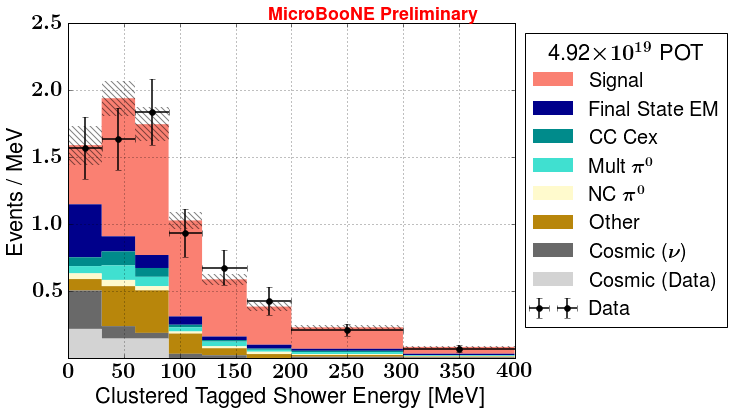

In [75]:
bins=[0,30,60,90,120,160,200,300,400] 
makeOnOffPlots('gamma_E',0,400,nbins=bins,xlabel='Clustered Tagged Shower Energy [MeV]',unit='MeV')

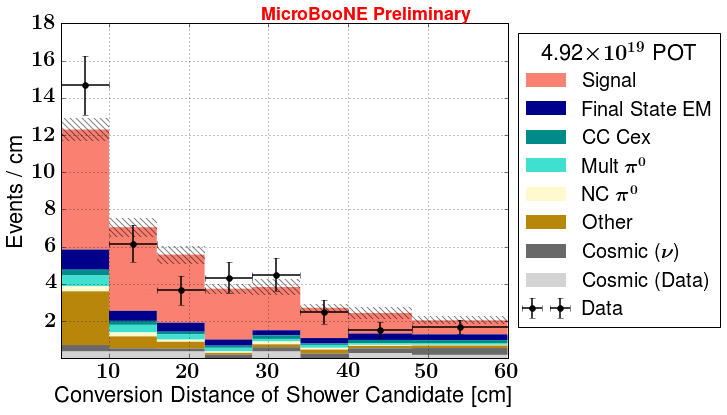

In [76]:
bins=[4,10,16,22,28,34,40,48,60] 
makeOnOffPlots('gamma_RL',4,60,nbins=bins,xlabel='Conversion Distance of Shower Candidate [cm]')

In [ ]:
#print float(cos_v.shape[0])/2167

In [ ]:
#print nu_EM_v.shape[0]
#print no_EM_v.shape[0]
#print ccoth_v.shape, ccgamma_v.shape, ccoth_v.shape[0] + ccgamma_v.shape[0]
#cos_v = df.query('bkgd_id == 1')
#cc1pi0_outFV_v = df.query('bkgd_id == 4')
#nue_v = df.query('bkgd_id == 6')
#antinumu_v = df.query('bkgd_id == 7')
#nccex_v = df.query('bkgd_id == 9')
#ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')
#ccgamma_v = df.query('bkgd_id == 10')
#kaon_v = df.query('bkgd_id == 11')
#ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
#no_EM_v = df.query('(bkgd_id ==12 or bkgd_id ==11) & ((pi0_low_type != 1 | pi0_low_origin != 1) & (pi0_high_type != 1 or pi0_high_origin!=1)) ')

#print ccgamma_v.shape[0]
#print ccoth_v.shape[0]

# cc1pi0_v = df.query('bkgd_id == 2')
# nc1pi0_v = df.query('bkgd_id == 3')
# multpi0_v = df.query('bkgd_id == 5')
# cccex_v = df.query('bkgd_id == 8 ')
# nu_EM_v = df.query('bkgd_id == 10 or\
#                    ( (bkgd_id ==12 or bkgd_id ==11) &\
#                    ((pi0_low_type == 1 & pi0_low_origin == 1 ) or\
#                     (pi0_high_type == 1 & pi0_high_origin == 1)) )')

# oth_v = df.query('bkgd_id == 0 or bkgd_id == 1 or bkgd_id == 4 or\
#                   bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or\
#                   bkgd_id == 13') # or \
#                   #or((bkgd_id ==12 or bkgd_id ==11) and\
#                   #((pi0_low_type != 1 or pi0_low_origin != 1) and\
#                   #(pi0_high_type != 1 or pi0_high_origin!=1) ))') #noise

            
# no_EM_v = df.query('(bkgd_id ==12 or bkgd_id ==11) & ((pi0_low_type != 1 | pi0_low_origin != 1) & (pi0_high_type != 1 or pi0_high_origin!=1)) ')

# print cc1pi0_v.shape[0] + nc1pi0_v.shape[0] + multpi0_v.shape[0] + \
#           cccex_v.shape[0] + nu_EM_v.shape[0] + oth_v.shape[0] + no_EM_v.shape[0]


# all_but_sig_v = df.query('bkgd_id != 2')

In [83]:
stage ='pi0' #_dqdx'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='shower_tree')
df = pd.DataFrame(t)
df = df.query('shr_energy > 0. ')

a = rn.root2array(on,treename='shower_tree')
df0 = pd.DataFrame(a)
df0 = df0.query('shr_energy > 0. ')

b = rn.root2array(off,treename='shower_tree')
df1 = pd.DataFrame(b)
df1 = df1.query('shr_energy > 0. ')

In [86]:
#print df.info()

In [85]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

print cos_v.shape[0] + cc1pi0_v.shape[0] + nc1pi0_v.shape[0] + multpi0_v.shape[0] + \
          cccex_v.shape[0] + nu_EM_v.shape[0] + oth_v.shape[0]  #+ no_EM_v.shape[0]

UndefinedVariableError: name 'pi0_low_origin' is not defined